In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys


In [2]:

ROOT_DIR = os.path.dirname(os.path.abspath(''))
sys.path.append(ROOT_DIR)

data_path = os.path.join(ROOT_DIR, "data", "UCI HAR Dataset")

features = pd.read_csv(os.path.join(data_path, "features.txt"),
                       delim_whitespace=True, header=None, names=["index", "feature"])
feature_names = features["feature"].values

activity_labels = pd.read_csv(os.path.join(data_path, "activity_labels.txt"),
                              delim_whitespace=True, header=None, names=["id", "activity"])
activity_labels


C:\Users\Asus\AppData\Local\Temp\ipykernel_34168\3353533045.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(os.path.join(data_path, "features.txt"),
C:\Users\Asus\AppData\Local\Temp\ipykernel_34168\3353533045.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activity_labels = pd.read_csv(os.path.join(data_path, "activity_labels.txt"),


,id,activity
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [3]:
X_train = pd.read_csv(os.path.join(data_path, "train/X_train.txt"),
                      sep="\s+", header=None)
X_train.columns = feature_names

y_train = pd.read_csv(os.path.join(data_path, "train/y_train.txt"),
                      sep="\s+", header=None, names=["Activity"])

X_test = pd.read_csv(os.path.join(data_path, "test/X_test.txt"),
                     sep="\s+", header=None)
X_test.columns = feature_names

y_test = pd.read_csv(os.path.join(data_path, "test/y_test.txt"),
                     sep="\s+", header=None, names=["Activity"])


In [4]:
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

df = pd.concat([X, y], axis=1)
df.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [5]:
activity_map = dict(zip(activity_labels.id, activity_labels.activity))
df["Activity"] = df["Activity"].map(activity_map)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
df["Activity"].value_counts()

Shape of X: (10299, 561)
Shape of y: (10299, 1)


Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

In [6]:
feature_groups = {
    "TimeBodyAcc": [col for col in feature_names if "tBodyAcc" in col],
    "TimeGravityAcc": [col for col in feature_names if "tGravityAcc" in col],
    "TimeBodyGyro": [col for col in feature_names if "tBodyGyro" in col],
    "FrequencyBodyAcc": [col for col in feature_names if "fBodyAcc" in col],
    "FrequencyBodyGyro": [col for col in feature_names if "fBodyGyro" in col],
}

for group, cols in feature_groups.items():
    print(f"{group}: {len(cols)} features")


TimeBodyAcc: 108 features
TimeGravityAcc: 53 features
TimeBodyGyro: 108 features
FrequencyBodyAcc: 171 features
FrequencyBodyGyro: 79 features


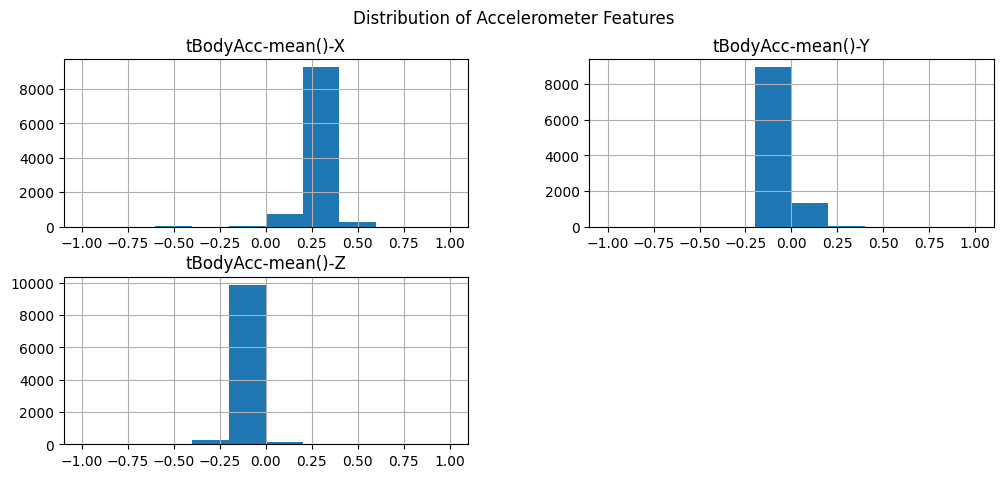

In [7]:
sample_cols = feature_groups["TimeBodyAcc"][:3]

df[sample_cols].hist(figsize=(12, 5))
plt.suptitle("Distribution of Accelerometer Features")
plt.show()


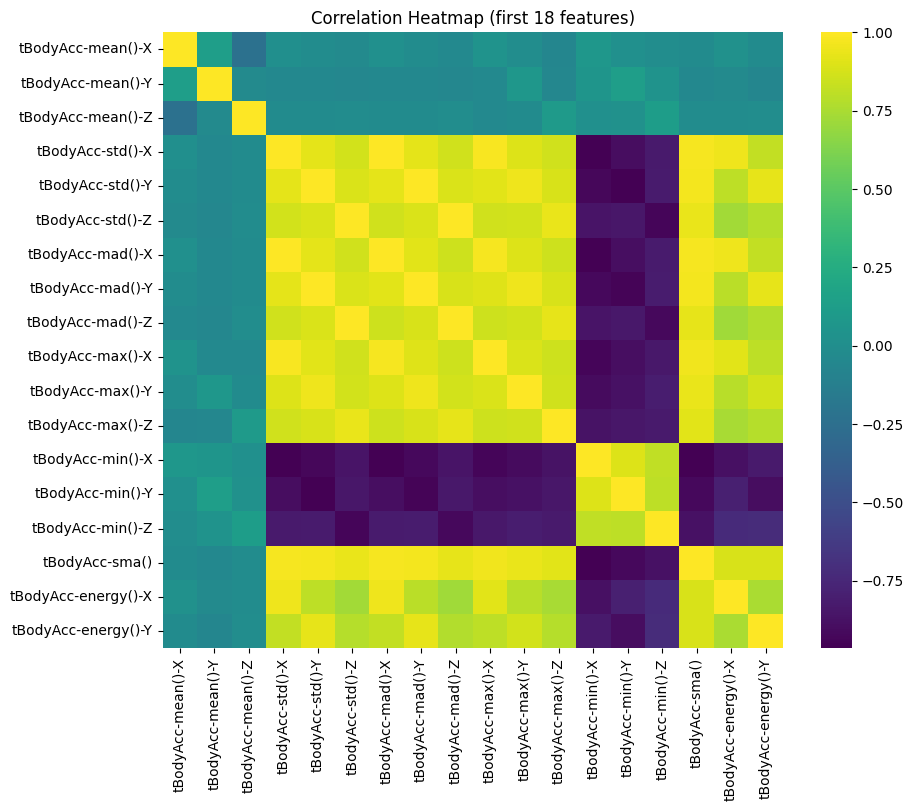

In [8]:
corr = df.iloc[:, :18].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="viridis", annot=False)
plt.title("Correlation Heatmap (first 18 features)")
plt.show()


In [9]:
feature_variances = X.var().sort_values(ascending=True)
feature_variances.head(10)

tBodyAcc-mean()-Y                   0.001379
tBodyAcc-mean()-Z                   0.002813
fBodyAccJerk-bandsEnergy()-57,64    0.002872
fBodyGyro-bandsEnergy()-33,40       0.003409
fBodyGyro-bandsEnergy()-33,48       0.004187
fBodyGyro-bandsEnergy()-33,40       0.004357
tBodyAcc-mean()-X                   0.004574
fBodyGyro-bandsEnergy()-33,48       0.004626
fBodyGyro-bandsEnergy()-25,48       0.005098
fBodyGyro-bandsEnergy()-57,64       0.005126
dtype: float64

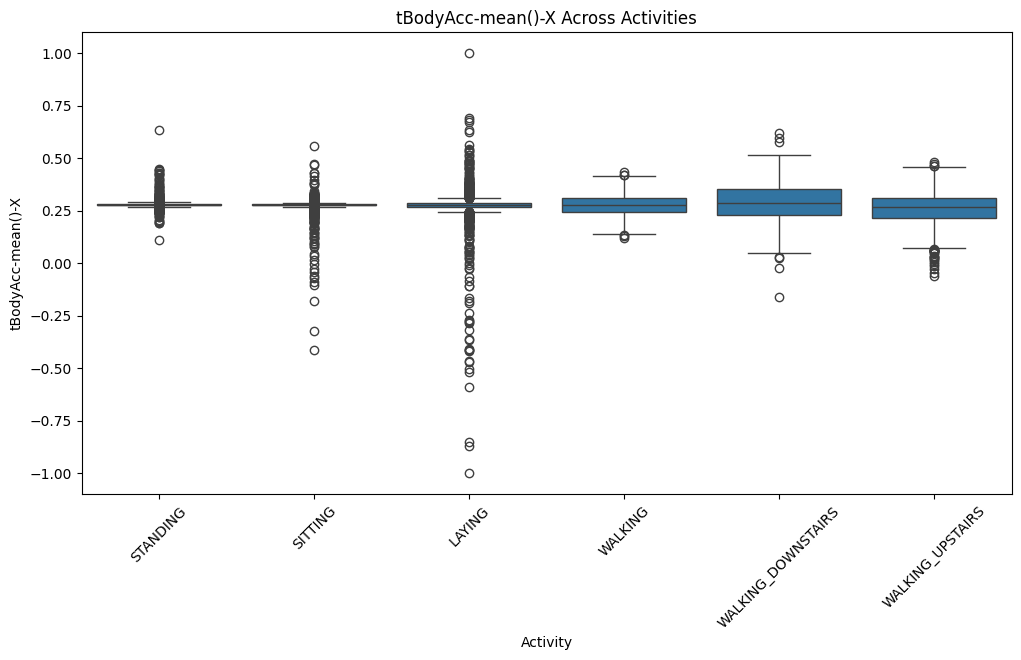

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Activity", y="tBodyAcc-mean()-X")
plt.xticks(rotation=45)
plt.title("tBodyAcc-mean()-X Across Activities")
plt.show()
